Lab 1: Using Discriptive Statistics to Evaluate Daily Returns between Coca-Cola and Pepsi

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2: Install Required Libraries

In [37]:
!pip install openpyxl matplotlib pandas

Step 3: Import Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

Step 4: Load the Excel File

In [57]:
import requests
import pandas as pd

file_id = '1bRR5Z6ui3Ycz46HybX42FSSPcE_L4LQFLo0eVOVg7kI'
url = f'https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx'

response = requests.get(url)
if response.status_code == 200:
    with open('MyGoogleSheet.xlsx', 'wb') as f:
        f.write(response.content)

    df = pd.read_excel('MyGoogleSheet.xlsx', engine='openpyxl')
    display(df.head())
else:
    print(f"Error downloading file: {response.status_code}")

,Date,Company,Adj Close,Daily Return
0,2024-01-02,KO,56.78,NaN
1,2024-01-03,KO,56.91,0.0023
2,2024-01-04,KO,56.72,-0.0033
3,2024-01-05,KO,56.64,-0.0014
4,2024-01-08,KO,57.05,0.0072


Step 5: Create Data Frame

In [20]:
ko_df = df[df['Ticker'] == 'KO'].copy()
pepsi_df = df[df['Ticker'] == 'PEP'].copy()

print("\nCoca-Cola Daily Returns:")
print(ko_df[['Date', 'Adj Close', 'Daily Return']].head())

print("\nPepsi Daily Returns:")
print(pepsi_df[['Date', 'Adj Close', 'Daily Return']].head())


Coca-Cola Daily Returns:
        Date  Adj Close  Daily Return
0 2024-01-02      56.78           NaN
1 2024-01-03      56.91        0.0023
2 2024-01-04      56.72       -0.0033
3 2024-01-05      56.64       -0.0014
4 2024-01-08      57.05        0.0072

Pepsi Daily Returns:
          Date  Adj Close  Daily Return
251 2024-01-02     162.68        1.6809
252 2024-01-03     162.72        0.0002
253 2024-01-04     161.33       -0.0085
254 2024-01-05     158.95       -0.0148
255 2024-01-08     159.11        0.0010


Step 6: Display Sample Rows

In [35]:
print("Sample rows from the dataset:")
print(df.head())

Sample rows from the dataset:
        Date Ticker  Adj Close  Daily Return
1 2024-01-03     KO      56.91        0.0023
2 2024-01-04     KO      56.72       -0.0033
3 2024-01-05     KO      56.64       -0.0014
4 2024-01-08     KO      57.05        0.0072
5 2024-01-09     KO      56.95       -0.0018


Step 7: Clean and Format the Data

In [58]:
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Daily Return'])  # removes rows with missing returns

Step 8: Seperate Coco-Cola and Pepsi Data

In [ ]:
ko_df = df[df['Company'] == 'Coca-Cola']. copy()
pepsi_df = df[df['Company'] == 'Pepsi'] . copy()

In [38]:
ko_df = df[df['Ticker'] == 'KO'].copy()
pepsi_df = df[df['Ticker'] == 'PEP'].copy()

print("\nCoca-Cola Daily Returns:")
print(ko_df[['Date', 'Adj Close', 'Daily Return']].head())

print("\nPepsi Daily Returns:")
print(pepsi_df[['Date', 'Adj Close', 'Daily Return']].head())


Coca-Cola Daily Returns:
        Date  Adj Close  Daily Return
1 2024-01-03      56.91        0.0023
2 2024-01-04      56.72       -0.0033
3 2024-01-05      56.64       -0.0014
4 2024-01-08      57.05        0.0072
5 2024-01-09      56.95       -0.0018

Pepsi Daily Returns:
          Date  Adj Close  Daily Return
251 2024-01-02     162.68        1.6809
252 2024-01-03     162.72        0.0002
253 2024-01-04     161.33       -0.0085
254 2024-01-05     158.95       -0.0148
255 2024-01-08     159.11        0.0010


Step 9: Visualize Daily Returns with Box and Whisker Plots

/tmp/ipython-input-4230467824.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


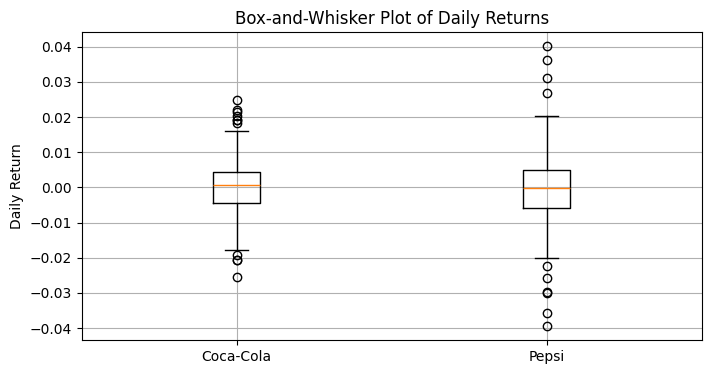

In [56]:
plt.figure(figsize=(8, 4))
plt.boxplot(
    [ko_clean['Daily Return'], pepsi_clean['Daily Return']],
    labels=['Coca-Cola', 'Pepsi'])
plt.title('Box-and-Whisker Plot of Daily Returns')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()
